# 1 pracownia fizyczna - ćwiczenie 9


In [1]:
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# długość drutu [m]
wire_len = [
    # first person
    0.945,
    0.951,
    0.950,
    0.950,
    0.949,
    # second person
    0.949,
    0.950,
    0.948,
    0.949,
    0.949,
]

# błąd pomiaru średnicy drutu i grubości wskazówki[mm]
zero_ind_err = -0.04

# średnica drutu [mm] (pomiar surowy)
wire_d = [0.77, 0.77, 0.77, 0.77, 0.77]

# grubość wskazówki [mm] (pomiar surowy)
needle_d = [0.58, 0.57, 0.58, 0.58, 0.58]

# korekta błędu pomiaru średnicy drutu i grubości wskazówki [mm]
wire_d = np.array(wire_d) - zero_ind_err
needle_d = np.array(needle_d) - zero_ind_err

print("Po korekcie:")
print("d:", wire_d)
print("d_w:", needle_d)

# obciążenia dodatkowe [kg]
wire_weights = [1, 2, 3, 4, 5, 6, 6.5, 6.5, 6, 5, 4, 3, 2, 1]

# wydłużenie drutu dla obciążeń dodatkowych [l. podziałek]
wire_len_diff_1 = [1, 2, 4, 5, 8, 11, 13, 13, 11, 9, 7, 6, 5, 4]
wire_len_diff_2 = [1, 2, 5, 7, 8, 9, 10, 10, 9, 8, 7, 5, 4, 3]

Po korekcie:
d: [0.81 0.81 0.81 0.81 0.81]
d_w: [0.62 0.61 0.62 0.62 0.62]


## Szerokość podziałki mikroskopu


In [3]:
# szerokość wskazówki [l. podziałek]
d_w = 10

# szerokość podziałki mikroskopu [mm]
needle_d_avg = np.mean(needle_d)
d_m = needle_d_avg / d_w

print("d_m:", d_m)

d_m: 0.06180000000000001


## Wydłużenie drutu $\Delta l$


In [4]:
# wydłużenie drutu w [mm]
wire_len_diff_1_mm = np.array(wire_len_diff_1) * d_m
wire_len_diff_2_mm = np.array(wire_len_diff_2) * d_m

print("Delta l 1:", wire_len_diff_1_mm)
print("Delta l 2:", wire_len_diff_2_mm)

Delta l 1: [0.0618 0.1236 0.2472 0.309  0.4944 0.6798 0.8034 0.8034 0.6798 0.5562
 0.4326 0.3708 0.309  0.2472]
Delta l 2: [0.0618 0.1236 0.309  0.4326 0.4944 0.5562 0.618  0.618  0.5562 0.4944
 0.4326 0.309  0.2472 0.1854]


## Regresja liniowa


In [5]:
from sklearn.linear_model import LinearRegression

# wire_weights_np = np.array(wire_weights)

m = np.append(wire_weights, wire_weights).reshape(-1, 1)
l = np.append(wire_len_diff_1_mm, wire_len_diff_2_mm)

model = LinearRegression()
model.fit(m, l)

wire_len_pred = model.predict(m)

a = model.coef_[0]
b = model.intercept_


print("a:", a)
print("b:", b)
print("R^2:", model.score(m, l))

a: 0.10316048158640226
b: 0.007462393767705411
R^2: 0.8890416825230292


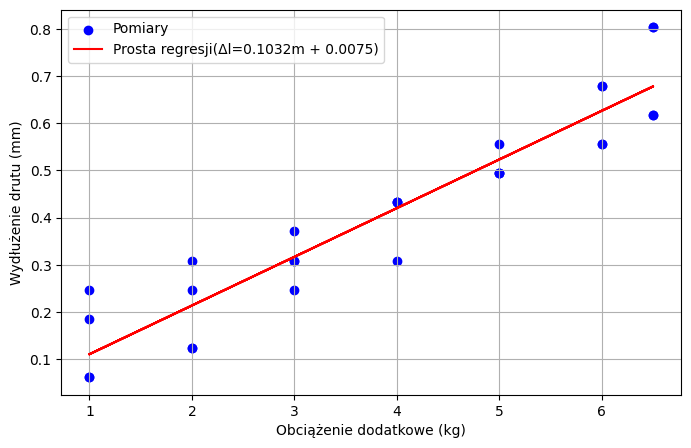

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(m, l, label="Pomiary", color="blue")
plt.plot(
    m,
    wire_len_pred,
    label=f"Prosta regresji(Δl={model.coef_[0]:.4f}m + {model.intercept_:.4f})",
    color="red",
)
plt.xlabel("Obciążenie dodatkowe (kg)")

plt.ylabel("Wydłużenie drutu (mm)")
# plt.title(
#     "Prosta regresji liniowej wydłużenia drutu w zależności od obciążenia dodatkowego"
# )
plt.legend()
plt.grid()
plt.show()

## Średnie wartości:


In [7]:
wire_len_avg = np.mean(wire_len)
wire_d_avg = np.mean(wire_d)
needle_d_avg = np.mean(needle_d)

In [8]:
display(Math(r"\bar{l} = " + str(wire_len_avg)))
display(Math(r"\bar{d} = " + str(wire_d_avg)))
display(Math(r"\bar{d_w} = " + str(needle_d_avg)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Moduł Younga

$$
E = \frac{4g\bar{l}}{\pi\bar{d}^2 \beta_1}
$$


In [9]:
# przeliczenie na metry
wire_d_avg_m = wire_d_avg / 1000
beta_1_m = a / 1000
E = (4 * 9.81 * wire_len_avg) / (np.pi * wire_d_avg_m**2 * beta_1_m)

print("E = ", E)

E =  175130561372.73004


Wartość bliska 180 GPa, co jest wartością charakterystyczną dla stali.


## Niepewności pomiarowe


### Niepewności pomiarowe średnich


$$
u_c(x) = \sqrt{u_A^2(x) + u_B^2(x)}
$$

$$
u_A(x) = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

$$
u_B(x) = \frac{\Delta x}{\sqrt{3}}
$$


In [10]:
# długość drutu
# uA(l)
uA_l = np.std(wire_len, ddof=1)
# display(Math(r"u_A(l) = " + str(uA_l)))

uB_l = 0.01 / np.sqrt(3)

u_l = np.sqrt(uA_l**2 + uB_l**2)
display(Math(r"u(l) = " + str(u_l)))

# średnica drutu
# wyniki nie wykazują rozrzutu, więc liczymy niepewność typu B

uB_d = 0.001 / np.sqrt(3)

u_d = uB_d
display(Math(r"u(d) = " + str(u_d)))

# grubość wskazówki

uA_dw = np.std(needle_d, ddof=1)
# display(Math(r"u_A(d_w) = " + str(uA_dw)))

uB_dw = 0.001 / np.sqrt(3)

u_dw = np.sqrt(uA_dw**2 + uB_dw**2)
display(Math(r"u(d_w) = " + str(u_dw)))


# display(Math(r"u_B(d) = " + str(wire_d_dev)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Niepewność standardowa współczynników regresji


In [11]:
model.coef_[0], model.intercept_, model.score(m, l)


# Obliczanie niepewności dla współczynników
n = len(m)
y_pred = model.predict(m)
s_y = np.sqrt(np.sum((l - y_pred) ** 2) / (n - 2))

# Obliczanie niepewności standardowych dla a i b
u_a = s_y * np.sqrt(n / (n * np.sum(m**2) - np.sum(m) ** 2))
u_b = s_y * np.sqrt(np.sum(m**2) / (n * np.sum(m**2) - np.sum(m) ** 2))

print(f"u_a = {u_a:.6f}")
print(f"u_b = {u_b:.6f}")

u_a = 0.007147
u_b = 0.031184


### Niepewność standardowa modułu Younga

$$
u_c(E) = \frac{4g}{\pi \bar{d}^2 a}
\sqrt{ u^2(l) + \left( \frac{2\bar{l}}{\bar{d}} \right)^2 u^2(d) + \left( \frac{\bar{l}}{a} \right)^2 u^2(a) }.
$$


In [12]:
g = 9.81

d_m = wire_d_avg * 10**-3
u_d_m = u_d * 10**-3


u_E = (
    (4 * g)
    / (np.pi * d_m**2 * a)
    * np.sqrt(
        u_l**2
        + (2 * wire_len_avg / d_m) ** 2 * u_d_m**2
        + (wire_len_avg / a) ** 2 * u_a**2
    )
)

display(Math(r"u(E) = " + str(u_E)))

<IPython.core.display.Math object>

## Wykresy


### Wykres histerezy


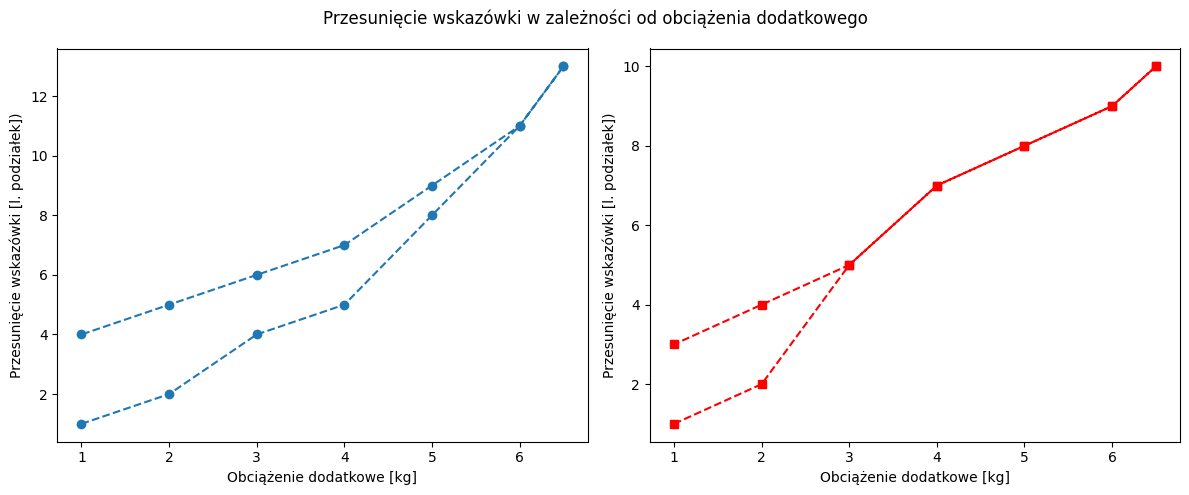

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(wire_weights, wire_len_diff_1, marker="o", linestyle="--")
axes[0].set_xlabel("Obciążenie dodatkowe [kg]")
axes[0].set_ylabel("Przesunięcie wskazówki [l. podziałek])")

axes[1].plot(wire_weights, wire_len_diff_2, marker="s", linestyle="--", color="r")
axes[1].set_xlabel("Obciążenie dodatkowe [kg]")
axes[1].set_ylabel("Przesunięcie wskazówki [l. podziałek])")

fig.suptitle("Przesunięcie wskazówki w zależności od obciążenia dodatkowego")

plt.tight_layout()
plt.show()

### Wykres regresji z niepewnościami


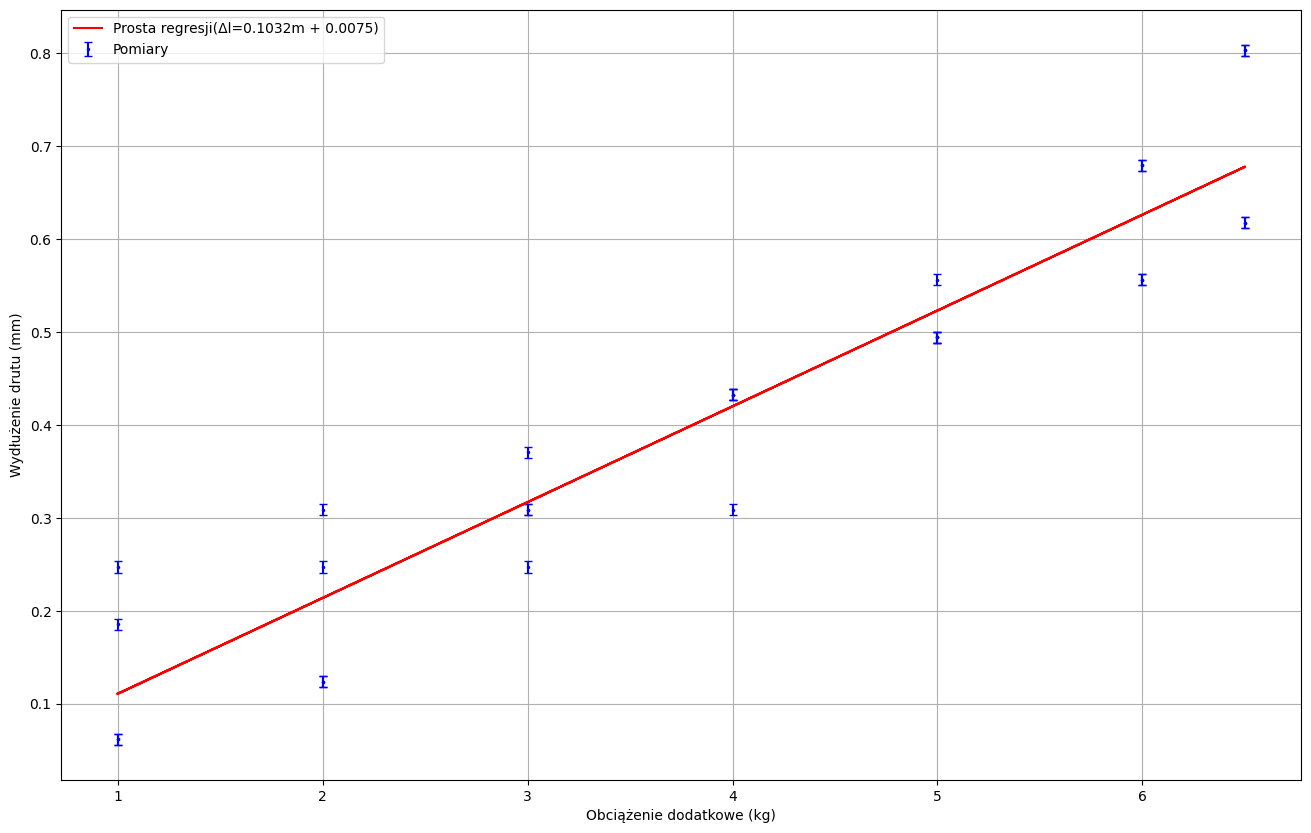

In [14]:
plt.figure(figsize=(16, 10))
plt.errorbar(
    m, l, yerr=u_l, fmt=".", markersize=3, label="Pomiary", color="blue", capsize=3
)
plt.plot(
    m,
    wire_len_pred,
    label=f"Prosta regresji(Δl={model.coef_[0]:.4f}m + {model.intercept_:.4f})",
    color="red",
)
plt.xlabel("Obciążenie dodatkowe (kg)")
plt.ylabel("Wydłużenie drutu (mm)")
# plt.title(
#     "Prosta regresji liniowej wydłużenia drutu w zależności od obciążenia dodatkowego"
# )
plt.legend()
plt.grid()
plt.show()